<a href="https://colab.research.google.com/github/AdaobiNwafor/DataScience-Projects/blob/main/H1BC_Approvals_2011_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
from os import listdir
import glob

# filepaths = [f for f in listdir('/content/H1B') if f.endswith('.csv')]
# df = pd.concat(map(pd.read_csv, filepaths))

df = pd.concat(map(pd.read_csv, glob.glob('/content/H1B/*.csv')))


In [33]:
df.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
0,2014,TANANA VALLEY CLINIC,0,0,1,0,62,NaN,AK,FAIRBANKS,99701.0,NaN,NaN,NaN,NaN
1,2014,DEPT OF VETERANS AFFAIRS BIRMINGHA,0,0,1,0,62,NaN,AL,BIRMINGHAM,35233.0,NaN,NaN,NaN,NaN
2,2014,AL SCHOOL OF MATHEMATICS & SCIENCE,0,0,1,0,99,NaN,AL,MOBILE,36604.0,NaN,NaN,NaN,NaN
3,2014,PACWORX INC,0,1,0,0,54,NaN,AZ,PHOENIX,85009.0,NaN,NaN,NaN,NaN
4,2014,ABLE CHEMICAL TECHNOLOGY INC,1,0,0,0,32,NaN,CA,ARCADIA,91006.0,NaN,NaN,NaN,NaN


In [34]:
tech = df[df['NAICS'] == 51]

In [42]:
tech.drop('Tax ID', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
tech.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval,Overall Denial
17,2014,FJ PRODUCTIONS INC,1,0,0,0,51,CA,SHERMAN OAKS,91403.0,NaN,NaN,NaN,NaN,NaN,NaN
32,2014,VITACOM SERVICES CORPORATION,0,0,1,0,51,FL,MIAMI,33173.0,NaN,NaN,NaN,NaN,NaN,NaN
83,2014,COOL HAND LUKE PRODUCTIONS INC,1,0,0,0,51,NY,NEW YORK,10019.0,NaN,NaN,NaN,NaN,NaN,NaN
88,2014,THE E W SCRIPPS COMPANY,1,0,0,0,51,OH,CINCINNATI,45202.0,NaN,NaN,NaN,NaN,NaN,NaN
205,2014,MYBUYS INC,1,0,0,0,51,CA,SAN MATEO,94402.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
tech.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval,Overall Denial
17,2014,FJ PRODUCTIONS INC,1,0,0,0,51,CA,SHERMAN OAKS,91403.0,NaN,NaN,NaN,NaN,NaN,NaN
32,2014,VITACOM SERVICES CORPORATION,0,0,1,0,51,FL,MIAMI,33173.0,NaN,NaN,NaN,NaN,NaN,NaN
83,2014,COOL HAND LUKE PRODUCTIONS INC,1,0,0,0,51,NY,NEW YORK,10019.0,NaN,NaN,NaN,NaN,NaN,NaN
88,2014,THE E W SCRIPPS COMPANY,1,0,0,0,51,OH,CINCINNATI,45202.0,NaN,NaN,NaN,NaN,NaN,NaN
205,2014,MYBUYS INC,1,0,0,0,51,CA,SAN MATEO,94402.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
tech['Continuing Approvals'].isnull().value_counts()

False    23594
True      3200
Name: Continuing Approvals, dtype: int64

In [50]:
tech['Continuing Approval'].isnull().value_counts()

True     23594
False     3200
Name: Continuing Approval, dtype: int64

In [54]:
tech = tech.fillna(0)


False    26794
Name: Initial Approval, dtype: int64

In [55]:
tech.isnull().value_counts()

Fiscal Year  Employer  Initial Approvals  Initial Denials  Continuing Approvals  Continuing Denials  NAICS  State  City   ZIP    Initial Approval  Initial Denial  Continuing Approval  Continuing Denial  Overall Approval  Overall Denial
False        False     False              False            False                 False               False  False  False  False  False             False           False                False              False             False             26794
dtype: int64

In [56]:
tech.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval,Overall Denial
17,2014,FJ PRODUCTIONS INC,1,0,0,0,51,CA,SHERMAN OAKS,91403.0,0.0,0.0,0.0,0.0,0,0
32,2014,VITACOM SERVICES CORPORATION,0,0,1,0,51,FL,MIAMI,33173.0,0.0,0.0,0.0,0.0,0,0
83,2014,COOL HAND LUKE PRODUCTIONS INC,1,0,0,0,51,NY,NEW YORK,10019.0,0.0,0.0,0.0,0.0,0,0
88,2014,THE E W SCRIPPS COMPANY,1,0,0,0,51,OH,CINCINNATI,45202.0,0.0,0.0,0.0,0.0,0,0
205,2014,MYBUYS INC,1,0,0,0,51,CA,SAN MATEO,94402.0,0.0,0.0,0.0,0.0,0,0


In [96]:
# tech['Initial Approval'] = tech['Initial Approval'].astype('float64') 
# tech['Continuing Approval'] = tech['Continuing Approval'].astype('float64') 
# tech['Initial Denial'] = tech['Initial Denial'].astype('float64') 
# tech['Continuing Denial'] = tech['Continuing Denial'].astype('float64') 
# tech['Overall Approval'] = tech['Overall Approval'].astype('float64')
# tech['Overall Denial'] = tech['Overall Denial'].astype('float64')

In [67]:
# tech = tech.apply(pd.to_numeric, errors='ignore')

In [97]:
tech.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval,Overall Denial
17,2014,FJ PRODUCTIONS INC,1,0,0,0,51,CA,SHERMAN OAKS,91403.0,0.0,0.0,0.0,0.0,0.0,0.0
32,2014,VITACOM SERVICES CORPORATION,0,0,1,0,51,FL,MIAMI,33173.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2014,COOL HAND LUKE PRODUCTIONS INC,1,0,0,0,51,NY,NEW YORK,10019.0,0.0,0.0,0.0,0.0,0.0,0.0
88,2014,THE E W SCRIPPS COMPANY,1,0,0,0,51,OH,CINCINNATI,45202.0,0.0,0.0,0.0,0.0,0.0,0.0
205,2014,MYBUYS INC,1,0,0,0,51,CA,SAN MATEO,94402.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
tech.drop(['Overall Approval', 'Overall Denial'], axis=1)

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
17,2014,FJ PRODUCTIONS INC,1,0,0,0,51,CA,SHERMAN OAKS,91403.0,0.0,0.0,0.0,0.0
32,2014,VITACOM SERVICES CORPORATION,0,0,1,0,51,FL,MIAMI,33173.0,0.0,0.0,0.0,0.0
83,2014,COOL HAND LUKE PRODUCTIONS INC,1,0,0,0,51,NY,NEW YORK,10019.0,0.0,0.0,0.0,0.0
88,2014,THE E W SCRIPPS COMPANY,1,0,0,0,51,OH,CINCINNATI,45202.0,0.0,0.0,0.0,0.0
205,2014,MYBUYS INC,1,0,0,0,51,CA,SAN MATEO,94402.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59396,2019,WEVIDEO INC,0,0,1,0,51,CA,MOUNTAIN VIEW,94040.0,0.0,0.0,0.0,0.0
59413,2019,BRIGHTPEARL INC,0,0,1,0,51,TX,AUSTIN,78701.0,0.0,0.0,0.0,0.0
59421,2019,CAESAR HARDWARE INTERNATIONAL LIMI,1,0,0,0,51,CA,CITY OF INDUSTRY,91748.0,0.0,0.0,0.0,0.0
59423,2019,CAESAR HARDWARE INTERNATIONAL LIMI,1,0,0,0,51,CA,ROWLAND HEIGHTS,91748.0,0.0,0.0,0.0,0.0


In [105]:
tech['Overall Approval'] = tech['Initial Approval'] + tech['Continuing Approval']

In [106]:
tech.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval,Overall Denial
17,2014,FJ PRODUCTIONS INC,1,0,0,0,51,CA,SHERMAN OAKS,91403.0,0.0,0.0,0.0,0.0,0.0,0.0
32,2014,VITACOM SERVICES CORPORATION,0,0,1,0,51,FL,MIAMI,33173.0,0.0,0.0,0.0,0.0,0.0,0.0
83,2014,COOL HAND LUKE PRODUCTIONS INC,1,0,0,0,51,NY,NEW YORK,10019.0,0.0,0.0,0.0,0.0,0.0,0.0
88,2014,THE E W SCRIPPS COMPANY,1,0,0,0,51,OH,CINCINNATI,45202.0,0.0,0.0,0.0,0.0,0.0,0.0
205,2014,MYBUYS INC,1,0,0,0,51,CA,SAN MATEO,94402.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
tech['Initial Approvals'] = pd.to_numeric(tech['Initial Approvals'], errors='coerce')
tech['Continuing Approvals'] = pd.to_numeric(tech['Continuing Approvals'], errors='coerce')
tech['Initial Denials'] = pd.to_numeric(tech['Initial Denials'], errors='coerce')
tech['Continuing Denials'] = pd.to_numeric(tech['Continuing Denials'], errors='coerce')

In [137]:
tech['Overall Approval'] = tech['Initial Approval'] + tech['Continuing Approval'] + tech['Initial Approvals'] + tech['Continuing Approvals']

In [138]:
tech.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval,Overall Denial
17,2014,FJ PRODUCTIONS INC,1.0,0,0.0,0,51,CA,SHERMAN OAKS,91403.0,0,0,0,0,1.0,0.0
32,2014,VITACOM SERVICES CORPORATION,0.0,0,1.0,0,51,FL,MIAMI,33173.0,0,0,0,0,1.0,0.0
83,2014,COOL HAND LUKE PRODUCTIONS INC,1.0,0,0.0,0,51,NY,NEW YORK,10019.0,0,0,0,0,1.0,0.0
88,2014,THE E W SCRIPPS COMPANY,1.0,0,0.0,0,51,OH,CINCINNATI,45202.0,0,0,0,0,1.0,0.0
205,2014,MYBUYS INC,1.0,0,0.0,0,51,CA,SAN MATEO,94402.0,0,0,0,0,1.0,0.0


In [142]:
tech = tech.drop(['Initial Approval', 'Initial Approvals', 'Continuing Approval', 'Continuing Approvals', 'Initial Denial',
           'Initial Denials', 'Continuing Denial', 'Continuing Denials', 'Overall Denial'], axis=1)

In [143]:
tech.head()

,Fiscal Year,Employer,NAICS,State,City,ZIP,Overall Approval
17,2014,FJ PRODUCTIONS INC,51,CA,SHERMAN OAKS,91403.0,1.0
32,2014,VITACOM SERVICES CORPORATION,51,FL,MIAMI,33173.0,1.0
83,2014,COOL HAND LUKE PRODUCTIONS INC,51,NY,NEW YORK,10019.0,1.0
88,2014,THE E W SCRIPPS COMPANY,51,OH,CINCINNATI,45202.0,1.0
205,2014,MYBUYS INC,51,CA,SAN MATEO,94402.0,1.0


In [145]:
tech['Fiscal Year'].value_counts()

2019    3391
2020    3200
2018    3200
2016    2799
2014    2638
2017    2599
2015    2559
2013    2180
2012    2127
2011    2101
Name: Fiscal Year, dtype: int64

In [148]:
tech_state = tech.groupby('State')
approval_by_state = tech_state['Overall Approval'].sum().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

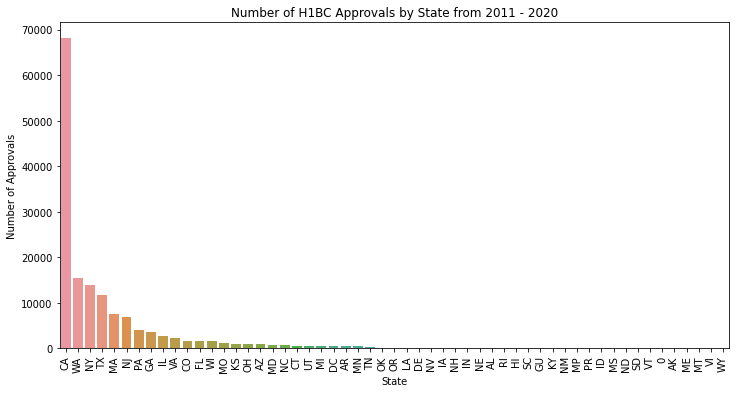

In [177]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=approval_by_state, x='State', y='Overall Approval')
plt.xlabel('State')
plt.ylabel('Number of Approvals')
plt.title('Number of H1BC Approvals by State from 2011 - 2020')
plt.xticks(rotation=90)

In [152]:
tech_top3 = tech[tech['State'] == 'CA']
tech_top2 = tech[tech['State'] == 'WA']
tech_top1 = tech[tech['State'] == 'NY']

In [153]:
tech_top3_state = pd.concat([tech_top1, tech_top3, tech_top2])

In [154]:
tech_top3_state.head()

,Fiscal Year,Employer,NAICS,State,City,ZIP,Overall Approval
83,2014,COOL HAND LUKE PRODUCTIONS INC,51,NY,NEW YORK,10019.0,1.0
222,2014,WOMENS ENEWS,51,NY,NEW YORK,10007.0,1.0
656,2014,HEART MEDIA MANAGEMENT SVCS,51,NY,NEW YORK,10019.0,1.0
725,2014,DAILY WORLD PRESS INC,51,NY,NEW YORK,10017.0,0.0
1294,2014,SPRINGER SCIENCE BUS MEDIA LLC,51,NY,NEW YORK,10013.0,1.0


In [156]:
tech_top3_state['State'].value_counts()

CA    10518
NY     3354
WA      807
Name: State, dtype: int64

In [159]:
tech_cities = tech_top3_state.groupby('City')
approval_by_city = tech_cities['Overall Approval'].sum().sort_values(ascending=False).head(20).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

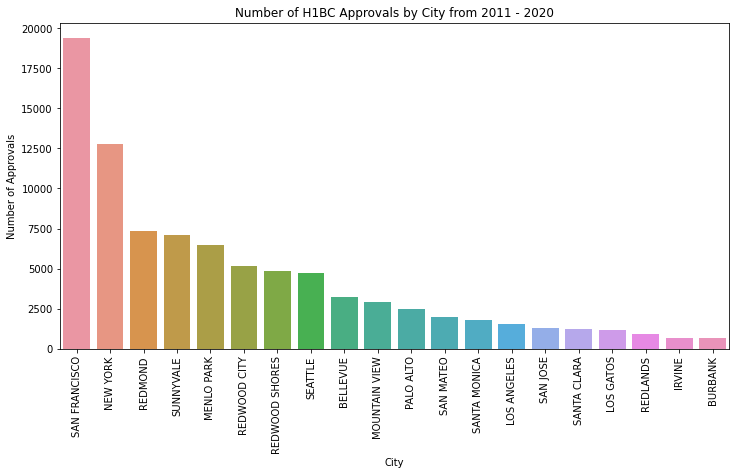

In [176]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=approval_by_city, x='City', y='Overall Approval')
plt.xlabel('City')
plt.ylabel('Number of Approvals')
plt.title('Number of H1BC Approvals by City from 2011 - 2020')
plt.xticks(rotation=90)

In [165]:
tech_top10_city_1 = tech_top3_state[tech_top3_state['City'] == 'SAN FRANCISCO']
tech_top10_city_2 = tech_top3_state[tech_top3_state['City'] == 'MOUNTAIN VIEW']
tech_top10_city_3 = tech_top3_state[tech_top3_state['City'] == 'BELLEVUE']
tech_top10_city_4 = tech_top3_state[tech_top3_state['City'] == 'SEATTLE']
tech_top10_city_5 = tech_top3_state[tech_top3_state['City'] == 'REDWOOD SHORES']
tech_top10_city_6 = tech_top3_state[tech_top3_state['City'] == 'REDWOOD CITY']
tech_top10_city_7 = tech_top3_state[tech_top3_state['City'] == 'MENLO PARK']
tech_top10_city_8 = tech_top3_state[tech_top3_state['City'] == 'SUNNYVALE']
tech_top10_city_9 = tech_top3_state[tech_top3_state['City'] == 'REDMOND']
tech_top10_city_0 = tech_top3_state[tech_top3_state['City'] == 'NEW YORK']

In [166]:
tech_top10_city = pd.concat([tech_top10_city_0, tech_top10_city_1, tech_top10_city_2, tech_top10_city_3, tech_top10_city_4, tech_top10_city_5, tech_top10_city_6, tech_top10_city_7, tech_top10_city_8, tech_top10_city_9])

In [169]:
tech_top10_city['City'].value_counts()

NEW YORK          2737
SAN FRANCISCO     2562
MOUNTAIN VIEW      463
SEATTLE            410
REDWOOD CITY       386
SUNNYVALE          339
REDMOND            153
MENLO PARK         147
BELLEVUE           142
REDWOOD SHORES      35
Name: City, dtype: int64

In [174]:
tech_top_employer = tech_top10_city.groupby('Employer')
approval_by_employer = tech_top_employer['Overall Approval'].sum().sort_values(ascending=False).head(10).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

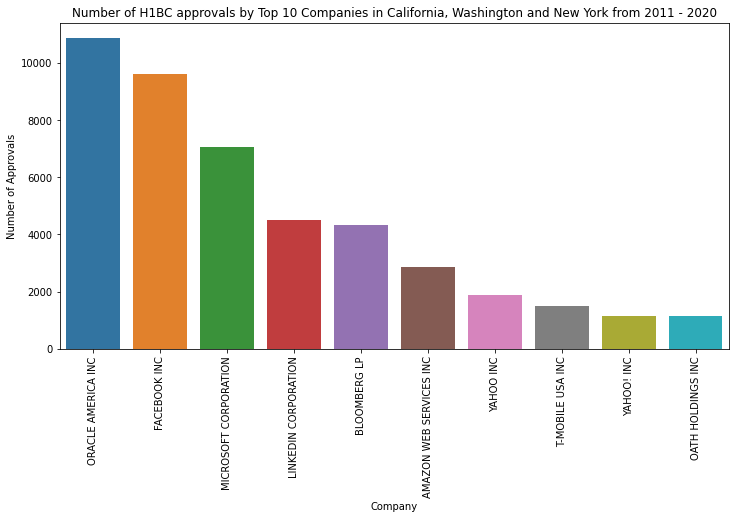

In [175]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data=approval_by_employer, x='Employer', y='Overall Approval')
plt.xlabel('Company')
plt.ylabel('Number of Approvals')
plt.title('Number of H1BC approvals by Top 10 Companies in California, Washington and New York from 2011 - 2020')
plt.xticks(rotation=90)

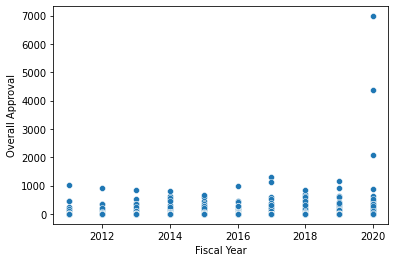

In [180]:
sns.scatterplot(data=tech, x='Fiscal Year', y='Overall Approval')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

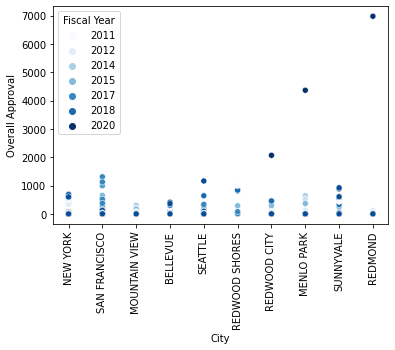

In [186]:
sns.scatterplot(data=tech_top10_city, x='City', y='Overall Approval', hue='Fiscal Year', palette='Blues')
plt.xticks(rotation=90)

In [212]:
top3_city = tech_top3_state[tech_top3_state['City'] == 'SAN FRANCISCO']
top3_city1 = tech_top3_state[tech_top3_state['City'] == 'NEW YORK']
top3_city2 = tech_top3_state[tech_top3_state['City'] == 'REDMOND']
tech_top3_city = pd.concat([top3_city, top3_city1, top3_city2])
tech_top3_city.head()

,Fiscal Year,Employer,NAICS,State,City,ZIP,Overall Approval
638,2014,OBSCURA DIGITAL INC,51,CA,SAN FRANCISCO,94107.0,1.0
750,2014,LOOKOUT INC,51,CA,SAN FRANCISCO,94111.0,7.0
898,2014,RIVERBED TECHNOLOGY INC,51,CA,SAN FRANCISCO,94105.0,55.0
900,2014,RIVERBED TECHNOLOGY INC,51,CA,SAN FRANCISCO,94107.0,23.0
2466,2014,PRACTICE FUSION INC,51,CA,SAN FRANCISCO,94102.0,7.0


In [244]:
tech_top3_city_grouped = tech_top3_city.groupby('Fiscal Year')
approval_by_top3_city = tech_top3_city_grouped['Overall Approval'].sum().sort_values(ascending=False).head(10).reset_index()

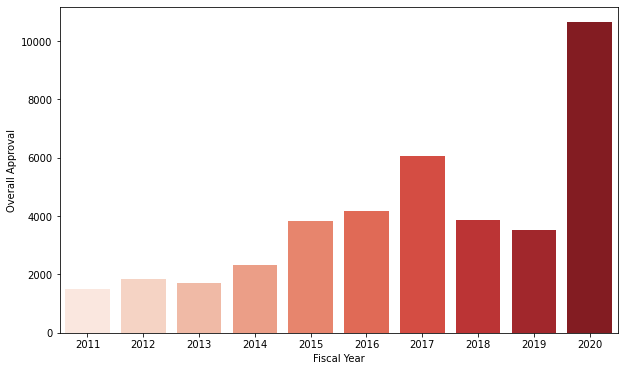

In [260]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=approval_by_top3_city, x='Fiscal Year', y='Overall Approval', palette='Reds')
# plt.ylim(0,20)
